## **Project Description**

### Main Objective of the Analysis: Prediction or Interpretation?

Our customer churn analysis focuses on both prediction and interpretation to identify at-risk customers and understand why they churn.

#### Focus on Prediction
- **Early Detection**: Predict at-risk customers for timely retention strategies.
- **Targeted Interventions**: Tailor retention efforts to maximize impact.
- **Cost Efficiency**: Retain customers cost-effectively, saving on acquisition costs.
- **Optimal Resource Allocation**: Efficiently allocate resources to high-impact areas.

#### Focus on Interpretation
- **Understanding Customer Behavior**: Identify behavioral patterns and demographic factors linked to churn.
- **Identifying Churn Drivers**: Uncover root causes and dissatisfaction areas for improvement.
- **Improving Products and Services**: Use insights for continuous enhancement and customer-centric innovation.

### Benefits to the Business and Stakeholders
- **Enhanced Customer Retention**: Implement effective strategies to increase customer lifetime value.
- **Data-Driven Decision Making**: Inform product development, marketing, and customer service strategies.
- **Competitive Advantage**: Stay ahead of trends, address issues proactively, and improve offerings.
- **Stakeholder Confidence**: Build confidence through a comprehensive, proactive approach to churn analysis.


### Dataset Description
The dataset was based from Kaggle Competition. It already has a split data set: 'train' and 'test' csv files.

**train.csv** - the training set. 
Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes.

**test.csv** - the test set.
Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").

### Data fields
* **state**, *string*. 2-letter code of the US state of customer residence
* **account_length**, *numerical*. Number of months the customer has been with the current telco provider
* **area_code**, *string*="area_code_AAA" where AAA = 3 digit area code.
* **international_plan**, *(yes/no)*. The customer has international plan.
* **voice_mail_plan**, *(yes/no)*. The customer has voice mail plan.
* **number_vmail_messages**, *numerical*. Number of voice-mail messages.
* **total_day_minutes**, *numerical*. Total minutes of day calls.
* **total_day_calls**, *numerical*. Total number of day calls.
* **total_day_charge**, *numerical*. Total charge of day calls.
* **total_eve_minutes**, *numerical*. Total minutes of evening calls.
* **total_eve_calls**, *numerical*. Total number of evening calls.
* **total_eve_charge**, *numerical*. Total charge of evening calls.
* **total_night_minutes**, *numerical*. Total minutes of night calls.
* **total_night_calls**, *numerical*. Total number of night calls.
* **total_night_charge**, *numerical*. Total charge of night calls.
* **total_intl_minutes**, *numerical*. Total minutes of international calls.
* **total_intl_calls**, *numerical*. Total number of international calls.
* **total_intl_charge**, *numerical*. Total charge of international calls
* **number_customer_service_calls**, *numerical*. Number of calls to customer service
* **churn**, *(yes/no)*. Customer churn - target variable.

source: [https://medium.com/@diego.hurtado.olivares/customer-churn-prediction-using-machine-learning-models-b088390ce0f0]
kaggle: [https://www.kaggle.com/code/diegohurtadoo/telco-churn-prediction-using-lstm-96-accuracy]

### Summary of Data Exploration
The data should be checked for missing values,outliers and inconsistencies.

### Import All required libraries.

In [84]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import seaborn as sns

### Explore the Data
Basic Exploratory Data Analysis
1. Check the shape of the dataset
2. View the first few rows
3. Summary statistics
4. Check data types
5. Check for missing values
6. Visualize the distribution of numerical variables.
7. Visualize the distribution of categorical variables.
8. Correlation Analysis using correlation matrices.
9. Identify outliers.
10. Time for some feature engineering!!!

In [48]:
# import both datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# copy the df_train for exploration. 
df = df_train.copy()

print(f"df shape: {df.shape}")
print(f"df_test shape: {df_test.shape}")


df shape: (4250, 20)
df_test shape: (750, 20)


In [50]:
# View the first few rows
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [51]:
# Calculate summary statistics for numerical columns
df.describe()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- **Account Length**: Average tenure is 100 months, ranging from 1 to 243 months.
- **Voicemail Messages**: Mostly zero, with an average of 7-8 messages.
- **Day Usage**: Around 180 minutes, with a maximum of 351.5 minutes.
- **Day Calls**: Average of 100 calls, ranging up to 165.
- **Day Charges**: Average charge is $30, ranging up to $59.76.
- **Evening Usage**: Similar pattern to day usage.
- **Night Usage**: Similar pattern to day and evening usage.
- **International Calls**: Relatively low usage and charges.
- **Customer Service Calls**: Mostly 1-2 calls, with some outliers.

In [53]:
# Check the Data types of each column in the dataset.
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [54]:
# Check for missing values
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

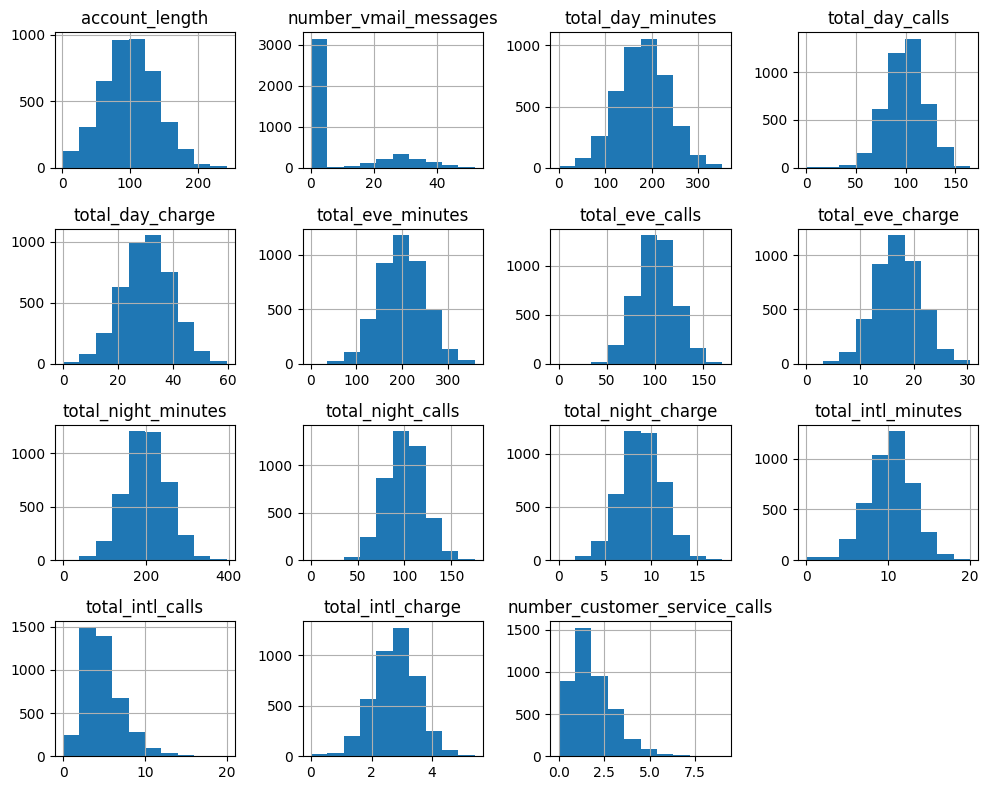

In [55]:
# Distribution of Numerical Variables
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

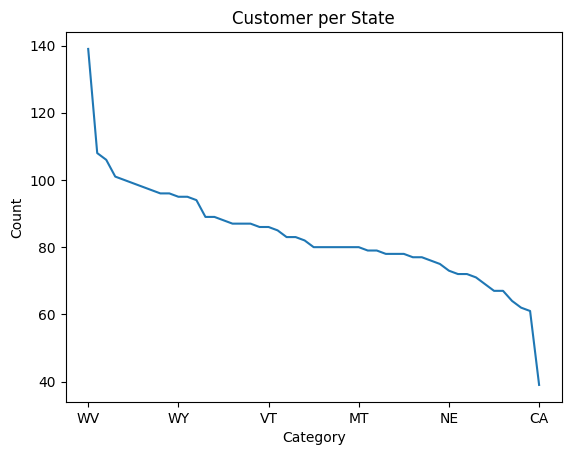

In [59]:
# Distribution of Categorical Variables:
df['state'].value_counts().plot(kind='line')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Customer per State')
plt.show()

In [73]:
# Correlation Analysis
# df.corr()
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()
object_cols = df.select_dtypes(include=['object'])
uniq_vals = object_cols.apply(lambda x: x.unique())
object_cols

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no
...,...,...,...,...,...
4245,MT,area_code_415,no,no,no
4246,WV,area_code_408,no,no,no
4247,NC,area_code_408,no,no,no
4248,HI,area_code_408,no,yes,no


In [90]:
# Use LabelEncoder for state
def encode_object_cols(df):
    label_encoder = LabelEncoder()
    object_cols = df.select_dtypes(include=['object'])
    for col in object_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    return df

df = encode_object_cols(df)
df.head()


# Correlation Analysis
# corr = df.corr()
# high_corr = corr[abs(corr) > 0.6]

# # create heatmap with improved style
# sns.set(font_scale=1.2)
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.heatmap(high_corr, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=.5, cbar=True, square=True, ax=ax)
# ax.set_title('High Correlation Features', fontsize=14)
# ax.set_xlabel('Features')
# ax.set_ylabel('Features')
# ax.tick_params(axis='x', labelrotation=45)
# plt.show()

# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(df.corr(), cmap='coolwarm')

df['churn'].value_counts(normalize=True)


churn
0    0.859294
1    0.140706
Name: proportion, dtype: float64

In [87]:
df_train.isnull().sum()
df_train.describe()

df_uniques = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns], columns=['Variable','Unique Values']).set_index('Variable')
print(df_uniques)

                               Unique Values
Variable                                    
state                                     51
account_length                           215
area_code                                  3
international_plan                         2
voice_mail_plan                            2
number_vmail_messages                     46
total_day_minutes                       1843
total_day_calls                          120
total_day_charge                        1843
total_eve_minutes                       1773
total_eve_calls                          123
total_eve_charge                        1572
total_night_minutes                     1757
total_night_calls                        128
total_night_charge                       992
total_intl_minutes                       168
total_intl_calls                          21
total_intl_charge                        168
number_customer_service_calls             10
churn                                      2
state_enco

In [91]:
from sklearn.preprocessing import StandardScaler

X = df.drop('churn', axis=1)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_encoded,area_code_encoded,international_plan_encoded,voice_mail_plan_encoded,churn_encoded
0,0.603081,0.170399,0.009943,-0.320547,1.679864,1.366857,-0.345510,1.163449,-0.345788,-0.093025,...,1.070820,1.247901,-0.579164,1.248591,-0.426346,0.603081,0.009943,-0.320547,1.679864,-0.404655
1,0.332212,0.926186,0.009943,-0.320547,-0.595286,-0.567911,1.169136,0.710014,1.169295,-1.571820,...,-0.752053,0.704379,0.232927,0.698342,-1.188960,0.332212,0.009943,-0.320547,-0.595286,-0.404655
2,0.603081,-0.409038,-1.398717,3.119667,-0.595286,-0.567911,2.206058,-1.456398,2.206218,-2.752070,...,-0.072337,-1.324770,1.045017,-1.328187,0.336268,0.603081,-1.398717,3.119667,-0.595286,-0.404655
3,0.670798,-0.635774,0.009943,3.119667,-0.595286,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,...,-0.270956,-0.056552,-0.579164,-0.053219,1.098882,0.670798,0.009943,3.119667,-0.595286,-0.404655
4,-0.480393,0.523099,1.418604,-0.320547,1.679864,1.218029,0.702522,-0.599910,0.702027,2.952139,...,0.241038,-0.998657,1.045017,-0.992669,1.098882,-0.480393,1.418604,-0.320547,1.679864,-0.404655
